# Neural Networks
## Lab session 2: Linear regression and Bayesian LR

In [3]:
import numpy as np
np.random.seed(42)
np.random.rand()

0.3745401188473625

### Case 1: linear regression

We generate a set of data from a one-dimensional line:

$$y_i = wx_i + b + \varepsilon_i \;,\;\; i=1,\ldots,N$$

where noise is drawn from a Gaussian distribution:

$$\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$$

In [67]:
# General parameters for the task
N = 25      # Number of points
w = 0.4     # Slope
b = 0.2     # Intercept
sigma = 0.1 # Variance of the noise

In [68]:
X = np.random.rand(N) * 10.0
y = w * X + b + np.random.randn(N)*np.sqrt(sigma)

In [69]:
# Magic command for ensuring the plots are rendered in the notebook, even without plt.show()
%matplotlib inline

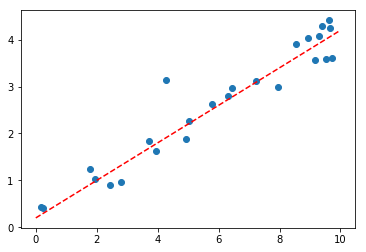

In [70]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
xrange = np.arange(0, 10, 0.01)
plt.plot(xrange, xrange * w + b, 'r--')

For a simplified notation, we can define $\mathbf{x} = \left[x \; 1\right]^T$ and:

$$ f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}\,.$$

In [71]:
X = np.hstack((X.reshape(N, 1), np.ones((N, 1))))

In [72]:
X

array([[2.43989643, 1.        ],
       [9.73010555, 1.        ],
       [3.93097725, 1.        ],
       [8.92046555, 1.        ],
       [6.31138626, 1.        ],
       [7.94811304, 1.        ],
       [5.02637093, 1.        ],
       [5.76903885, 1.        ],
       [4.92517694, 1.        ],
       [1.95242988, 1.        ],
       [7.22452115, 1.        ],
       [2.80772362, 1.        ],
       [0.24315966, 1.        ],
       [6.45472296, 1.        ],
       [1.77110679, 1.        ],
       [9.40458584, 1.        ],
       [9.53928577, 1.        ],
       [9.1486439 , 1.        ],
       [3.701587  , 1.        ],
       [0.15456617, 1.        ],
       [9.28318563, 1.        ],
       [4.28184148, 1.        ],
       [9.66654819, 1.        ],
       [9.63619977, 1.        ],
       [8.53009455, 1.        ]])

In classical (least squares) linear regression, we find the optimal $\mathbf{w}$ by minimizing:

$$\mathbf{w}^* = \min_{\mathbf{w}} \sum_{i=1}^N \left(y_i - \mathbf{w}^T\mathbf{x}\right)^2 \,.$$

More compactly, grouping everything by row in $\mathbf{X}$ and $\mathbf{y}$:

$$\min_{\mathbf{w}} \lVert \mathbf{y} - \mathbf{X}\mathbf{w} \rVert^2 \,.$$

Setting the gradient to zero and solving:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y} \,.$$

In [73]:
wopt = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

# wopt = np.linalg.pinv(X).dot(y)

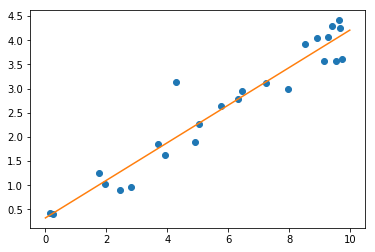

In [74]:
plt.plot(X[:, 0], y, 'o')
plt.plot(xrange, xrange * wopt[0] + wopt[1])

### Case 2: polynomial regression

This is similar to before, but points are drawn from a nonlinear function:

$$y_i = \sin\left(\frac{x_i}{4}\right) + \varepsilon_i$$

In [75]:
def nonlinfcn(x):
    return np.sin(x/4.0)

In [76]:
X = np.random.rand(N) * 10
y = nonlinfcn(X) + np.random.randn(N)*np.sqrt(sigma)

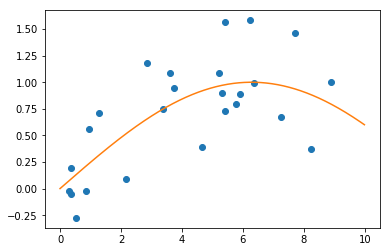

In [77]:
plt.plot(X, y, 'o')
plt.plot(xrange, nonlinfcn(xrange))

We approximate the function via polynomial regression of order $P$:

$$f(x) = \sum_{p=0}^P w_p x^p \,. $$

More compactly:

$$f(x) = \mathbf{w}^T\mathbf{h}(x) \,,$$

where:

$$\mathbf{h}(x) = \left[x^0, \ldots, x^P \right]^T \,.$$

In [78]:
P = 10
def power_exp(x):
    H = np.hstack([x.reshape(-1,1) ** i for i in range(0, P+1)])
    H = H / (10**np.arange(0, P+1)).reshape(1, -1)
    return H

power_exp(X[0:2])

array([[1.00000000e+00, 8.90005342e-01, 7.92109508e-01, 7.04981694e-01,
        6.27437473e-01, 5.58422703e-01, 4.96999189e-01, 4.42331933e-01,
        3.93677783e-01, 3.50375330e-01, 2.21149965e+00],
       [1.00000000e+00, 3.37995157e-01, 1.14240726e-01, 3.86128121e-02,
        1.30509435e-02, 4.41115569e-03, 1.49094926e-03, 5.03933629e-04,
        1.70327126e-04, 5.75697437e-05, 1.37995687e-04]])

In [79]:
H = power_exp(X)
wopt = np.linalg.solve(H.T.dot(H), H.T.dot(y))

(-2, 2)

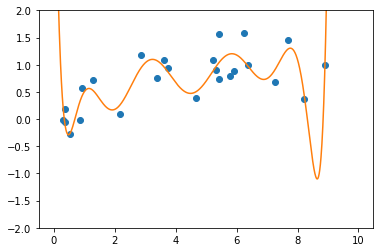

In [80]:
plt.plot(X, y, 'o')
plt.plot(xrange, power_exp(xrange).dot(wopt))
plt.ylim(-2, 2)

We can improve the result by adding some regularization to the optimization problem:

$$\min_{\mathbf{w}} \lVert \mathbf{y} - \mathbf{X}\mathbf{w} \rVert^2 + C\lVert\mathbf{w}\rVert^2\,.$$

Setting the gradient to zero and solving:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X} + C\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{y} \,.$$

In [81]:
# Value of the regularization parameter
C = 0.001

In [82]:
wopt = np.linalg.inv(H.T.dot(H) + C*np.eye(P+1)).dot(H.T.dot(y))

(-2, 2)

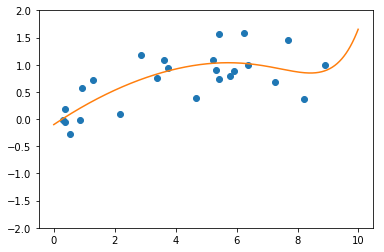

In [83]:
plt.plot(X, y, 'o')
plt.plot(xrange, power_exp(xrange).dot(wopt))
plt.ylim(-2, 2)